# Representing Data and Engineering Features(データとエンジニアリング機能の表現)

これまで、データは浮動小数点数の2次元配列として入力されると想定していました。  
ここで、各列はデータポイントを表す連続した特徴です。  
多くのアプリケーションでは、これはデータの収集方法ではありません。  
特定の一般的なタイプの特徴(a particular common type of feature)は、離散特徴(discrete feature)としても知られるカテゴリー特徴であり、通常は数値ではありません。カテゴリカル特徴(categorical feature)と連続特徴(continuous feature)の区別は、分類(classification)と回帰(regression)の区別に類似しています。出力側ではなく、入力側のみです。  
我々が見た連続的な特徴の例は、植物の花のピクセル輝度とサイズ測定である。  
カテゴリカルな特徴の例としては，製品のブランドが挙げられます。  
uct、製品の色、またはそれが販売されている部門（本、衣類、ハードウェア）。  
これらはすべて製品を説明することができる特性ですが、連続的に変化するわけではありません。  
製品は衣料品部門に属しているか、書籍部門に属しているかのどちらかです。  
メンターの間には中間地点がなく、異なるカテゴリーの自然な順序もない。  
本と衣服の間には中間地点がなく、異なるカテゴリーの自然な順序もない（本は衣服よりも大きくも小さくもない。本と服などの間ではなく)  

データが構成する特徴の種類に関係なく、それらをどのように表現するかは、機械学習モデルのパフォーマンスに大きな影響を与える可能性があります。  
第2章と第3章で、データのスケーリングが重要であることがわかりました。  
データを（たとえば、単位分散(ubit variance)に）再スケーリングしないでください。  
センチメートルで表すかインチで表すかに違いが生じます。  
また、第2章では、特徴の相互作用(interactions of feature)（product(積)）やより一般的な多項式(polynomaials)の追加など、追加の特徴(additional feature)でデータを拡張すると役立つ場合があることもわかりました。  

特定のアプリケーションに最適なデータをどのように表現するかという問題が知られています。  
特徴量エンジニアリング(feature enginiaring)として、データサイエンティストや機械学習の実務家が実世界の問題を解決しようとする際の主要なタスク(main tasks)の1つです。  
データを正しい方法で表現することは、選択した正確なパラメータよりも、教師付きモデルのパフォーマンスに大きな影響を与えることがあります。  

最初に、カテゴリカルフィーチャの重要で非常に一般的なケースについて説明し、次に特徴とモデルの特定の組み合わせに役立つ変換の例をいくつか示します。　　

**カテゴリカルフィーチャー(categorical feature)**
- データが離散であるときの、カテゴライズられた特徴(変数)のこと、データの種類によって２種類に分けることができる。　　
血液型・性別などの変数が順序関係を持たない吊義 (nominal)尺度データ、アンケートなどで用いられる満足度に関する選択肢「満足した、なんとも言えない、満足しない...」でカテゴリーの順序に意味を持っている順序(ordinal)尺度データ

### Ctagorical Variables(カテゴリカル変数)

例として、1994年の国勢調査データベースから導出された米国の成人所得のデータセットを使用します。  

成人データセットのタスクは、労働者の収入が50.000ドルを超えるか50.000ドル未満かを予測することです。  

このデータセットの特徴には、労働者の年齢(workers age)、雇用方法(how they are employed)（自営業(self employed)、民間企業の従業員(private industry employee)、政府職員(govoment employee)など）、教育(education)、性別(gender)、1週間の労働時間(working hours per week)、職業(occupation)などが含まれます。  

以下は、データセットの最初のいくつかのエントリを示す表です。

**Table 4-1. The first few entries in the adult dataset**  

| | age | workclass | education | gender | hours-per-week | occupation | income |
|------|-----|------------------|--------------|--------|----------------|-------------------|----------|
| 0 | 39 | State-gov | Bachelors | Male | 40 | Adm-clerical | <=50K |
| 1 | 50 | Self-emp-not-inc | Bachelors | Male | 13 | Exec-managerial | <=50K |
| 2 | 38 | Private | HS-grad | Male | 40 | Handlers-cleaners | <=50K |
| 3 | 53 | Private | 11th | Male | 40 | Handlers-cleaners | <=50K |
| 4 | 28 | Private | Bachelors | Female | 40 | Prof-specialty | <=50K |
| 5 | 37 | Private | Masters | Female | 40 | Exec-managerial | <=50K |
| 6 | 49 | Private | 9th | Female | 16 | Other-service | <=50K |
| 7 | 52 | Self-emp-not-inc | HS-grad | Male | 45 | Exec-managerial | >50K |
| 8 | 31 | Private | Masters | Female | 50 | Prof-specialty | >50K |
| 9 | 42 | Private | Bachelors | Male | 40 | Exec-managerial | >50K |
| 10 | 37 | Private | Some-college | Male | 80 | Exec-managerial | >50K |

このタスクは、収入(income)<= 50kと> 50kの2つのクラスを持つ分類タスクとして表現されます。  
正確な収入を予測し、これを回帰タスクにすることも可能です。  
ただし、それははるかに困難であり、50K部門だけで理解するのは興味深いことです。  

このデータセットでは、年齢と1週間あたりの時間数は継続的な特徴であり、処理方法を知っています。  
ただし、ワーククラス、教育、性別、および職業の機能はカテゴリに分類されます。それらはすべて、範囲ではなく可能な値の固定リストから取得され、数量ではなく質的特性を示します。  

出発点として、このデータのロジスティック回帰分類器を学習するとします。第2章から、ロジスティック回帰は次の式を使用して予測$ \hat {y} $を行うことがわかります。  

\begin{align*}
&\hat{y} = w[0] x[0] + w[1] x[1] + \dotsc + w[p] * x[p] + b > 0 &\text{ (1) linear
binary classification}
\end{align*}  

ここで、w[i]とbはトレーニングセットから学習した係数であり、x[i]は入力特徴です。  

この式は、x [i]が数値の場合は意味がありますが、x [2]が「Masters(修士)」または「Bachelors(学士)」の場合は意味がありません。  

したがって、ロジスティック回帰を適用する場合は、データを別の方法で表す必要があることは明らかです。

#### One-Hot-Encoding(Dummy variables)

カテゴリ変数を表す最も一般的な方法は、ダミー変数とも呼ばれる1つの hotencoding または one-out-of-N エンコーディングを使用することです。  

ダミー変数の背後にある考え方は、カテゴリ変数を、値0と1を持つことができる1つ以上の新しい機能に置き換えることです。  
値0と1は、式（1）（およびscikit-learnの他のすべてのモデル）で意味があります。  
次のようにカテゴリごとに1つの新機能を導入することで、任意の数のカテゴリを表すことができます。  

workclass特徴について、  
- 「Government Employee」
- 「Private Employee」
- 「Self Employed」、
- 「Self EmployedIncorporated」  

の可能な値があるとします。この4つの可能な値をエンコードするために、  

- 「Government Employee」
- 「Private Employee」
- 「Self Employed」、
- 「SelfEmployedIncorporated」  

という4つの新しい特徴を作成します。  
この人のワーククラスに対応する値がある場合、特徴は1であり、それ以外の場合は0です。  

したがって、4つの新特徴のうちの1つは、データポイントごとに1つになります。  
これが、これが one-ohot または one-out-of-N エンコーディングと呼ばれる理由です。  

原理をここに示します。  
1つの機能は、4つの新しい特徴を使用してエンコードされます。  
このデータを機械学習アルゴリズムで使用する場合、元のworkclass特徴を削除し、0-1機能のみを保持します。  

**Table 4-2. Encoding the workclass feature using one-hot encoding**  

| workclass | Government Employee | Private Employee | Self Employed | Self Employed Incorporated |
|----------------------------|---------------------|------------------|---------------|----------------------------|
| Government Employee | 1 | 0 | 0 | 0 |
| Private Employee | 0 | 1 | 0 | 0 |
| Self Employed | 0 | 0 | 1 | 0 |
| Self Employed Incorporated | 0 | 0 | 0 | 1 |

pandasを使用するか、scikit-learnを使用して、データをカテゴリ変数の one-hot エンコーディングに変換する方法は2つあります。  
これを書いている時点では、この設定にpandasを使用する方が少し簡単なので、このルートに行きましょう。  
まず、カンマ区切り値（CSV）ファイルからpandasを使用してデータを読み込みます。

In [43]:
import pandas as pd

# ファイルには列に名前を付けるヘッダーがないため、header = Noneを渡します
# そして、「names」で列名を明示的に指定します
data = pd.read_csv("data/adult.data", header=None, index_col=False,
                  names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                         'marital-status', 'occupation', 'relationship', 'race', 'gender',
                         'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                         'income'])
# 説明のために、一部の列のみを選択します
data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week',
             'occupation', 'income']]

# IPython.displayを使用すると、Jupyterノートブック内で優れた出力フォーマットが可能になります
# display(data.head())
print("Table 4-3. e first five rows of the adult dataset\n")
data.head()

Table 4-3. e first five rows of the adult dataset



age          workclass   education   gender  hours-per-week  \
0   39          State-gov   Bachelors     Male              40   
1   50   Self-emp-not-inc   Bachelors     Male              13   
2   38            Private     HS-grad     Male              40   
3   53            Private        11th     Male              40   
4   28            Private   Bachelors   Female              40   

           occupation  income  
0        Adm-clerical   <=50K  
1     Exec-managerial   <=50K  
2   Handlers-cleaners   <=50K  
3   Handlers-cleaners   <=50K  
4      Prof-specialty   <=50K

#### Checking string-encoded categorical data

このようなデータセットを読み取った後、最初に列に意味のあるカテゴリデータが実際に含まれているかどうかを確認することをお勧めします。  
人間（たとえばWebサイトのユーザー）によって入力されたデータを操作する場合、カテゴリの固定セットがない可能性があり、スペルと大文字の違いにより前処理が必要になる場合があります。  
たとえば、性別を「male(男性)」と指定した人と「man(男性)」と指定した人がいて、同じカテゴリを使用してこれら2つの入力を表現したい場合があります。  

列の内容を確認する良い方法は、pandas seriesのvalue_counts関数（データフレーム内の単一の列のタイプ）を使用して、一意の値とその表示頻度を表示することです。

In [7]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


このデータセットには、男性と女性の2つの性別の値があることがわかります。  
つまり、データは、one-hot-encodingを使用して表すのに適した形式になっています。  
実際のアプリケーションでは、すべての列を調べてその値を確認する必要があります。  
簡潔にするために、ここではこれをスキップします  

get_dummies関数を使用して、pandasでデータをエンコードする非常に簡単な方法があります。  
get_dummies関数は、オブジェクトタイプ（文字列など）またはカテゴリカル（これはまだ説明していない特別なパンダの概念です）を持つすべての列を自動的に変換します。

In [8]:
print("Original feature:\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Feature after get_dummies:\n", list(data_dummies.columns))

Original feature:
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Feature after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-ins

連続機能の年齢(age)と1週間あたりの時間数(hours-per-week)は変更されていませんが、カテゴリ機能は、可能な値ごとに1つの新しい特徴に拡張されていることがわかります。

In [9]:
data_dummies.head()

age  hours-per-week  workclass_ ?  workclass_ Federal-gov  \
0   39              40             0                       0   
1   50              13             0                       0   
2   38              40             0                       0   
3   53              40             0                       0   
4   28              40             0                       0   

   workclass_ Local-gov  workclass_ Never-worked  workclass_ Private  \
0                     0                        0                   0   
1                     0                        0                   0   
2                     0                        0                   1   
3                     0                        0                   1   
4                     0                        0                   1   

   workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  workclass_ State-gov  \
0                        0                            0                     1   
1                        0                            1                     0   
2                        0                            0                     0   
3                        0                            0                     0   
4                        0                            0                     0   

   ...  occupation_ Machine-op-inspct  occupation_ Other-service  \
0  ...                              0                          0   
1  ...                              0                          0   
2  ...                              0                          0   
3  ...                              0                          0   
4  ...                              0                          0   

   occupation_ Priv-house-serv  occupation_ Prof-specialty  \
0                            0                           0   
1                            0                           0   
2                            0                           0   
3                            0                           0   
4                            0                           1   

   occupation_ Protective-serv  occupation_ Sales  occupation_ Tech-support  \
0                            0                  0                         0   
1                            0                  0                         0   
2                            0                  0                         0   
3                            0                  0                         0   
4                            0                  0                         0   

   occupation_ Transport-moving  income_ <=50K  income_ >50K  
0                             0              1             0  
1                             0              1             0  
2                             0              1             0  
3                             0              1             0  
4                             0              1             0  

[5 rows x 46 columns]

これで、values属性を使用してdata_dummies DataFrameをNumPy配列に変換し、その上で機械学習モデルをトレーニングできます。  
モデルをトレーニングする前に、ターゲット変数（現在は2つの収入(income)列にエンコードされています）をデータから分離するように注意してください。  
出力変数または出力変数の派生プロパティを特徴表現に含めることは、教師あり機械学習モデルを構築する際の非常に一般的な間違いです。  

［警告ボックス]注意：pandasの列のインデックスには範囲の終わりが含まれるため、  
「 'age'： 'occupation_ Transport-moving'」には「occupation_ Transport-moving」が含まれます。　　
これは、範囲の終わりが含まれていないnumpy配列のスライスとは対照的です。「np.arange（11)[0:10]には、インデックス10のエントリは含まれていません。  

この場合、特徴を含む列のみを抽出します。つまり、age から occupation_Transport-moving までのすべての列を抽出します。  
この範囲にはすべての機能が含まれていますが、ターゲットは含まれていません。

In [23]:
feature = data_dummies.loc[:, 'age':'occupation_ Transport-moving']

# NumPy配列を抽出する
X = feature.values
y = data_dummies['income_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


これで、scikit-learnが処理できる方法でデータが表され、通常どおり続行できます。

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.81


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


この例では、トレーニングデータとテストデータの両方を含む DataFrame で get_dummies を呼び出しました。  
これは、カテゴリ値がトレーニングセットとテストセットで同じように表されるようにするために重要です。  

2つの異なるデータフレームにトレーニングセットとテストセットがあると想像してください。workclass特徴の「PrivateEmployee」値がテストセットに表示されない場合、pandasはこの機能の可能な値が3つだけであると想定し、3つの新しいダミー機能のみを作成します。  

現在、トレーニングセットとテストセットには異なる数の特徴があり、トレーニングセットで学習したモデルをテストセットに適用することはできません。 

さらに悪いことに、warkclass特徴の値がトレーニングセットに「GovernmentEmployee」と「PrivateEmployee」、テストセットに「SelfEmployed」と「SelfEmployedIncorporated」があると想像してください。  
どちらの場合も、pandasは2つの新しいダミーフィーチャを作成するため、エンコードされたデータフレームには同じ数のフィーチャが含まれます。  

ただし、2つのダミー機能は、トレーニングセットとテストセットでまったく異なる意味を持ちます。  
トレーニングセットの「GovernmentEmployee」を意味する列は、テストセットの「SelfEmployed」をエンコードします。  

このデータに基づいて機械学習モデルを構築した場合、実際には非常に異なることを意味するのに、列は同じことを意味すると想定されるため（同じ位置にあるため）、非常にうまく機能しません。  

これを修正するには、トレーニングデータポイントとテストデータポイントの両方を含むDataFrameでget_dummiesを呼び出すか、get_dummiesを呼び出した後、トレーニングセットとテストセットの列名が同じであることを確認して、セマンティクスが同じであることを確認します。

### Numbers Can Encoding Categoticals(数字はカテゴリをエンコードできます)

adultデータセットの例では、カテゴリ変数は文字列としてエンコードされていました。  
一方では、それはスペルミスの可能性を開きますが、他方では、それは明らかに変数をカテゴリーとしてマークします。  

多くの場合、保存を容易にするためであれ、データの収集方法のためであれ、カテゴリ変数は整数としてエンコードされます。  
たとえば、adulrデータセットの人口調査(imagine the census)データがアンケートを使用して収集され、workclassの回答が0（最初のボックスがチェックされている）、1（2番目のボックスがチェックされている）、2（3番目のボックスがチェックされている）として記録されたとします。  
等々。これで、列には「Private」のような文字列ではなく、0〜8の数値が含まれるようになり、データセットを表すテーブルを見る人には、この変数を連続として扱うべきかカテゴリとして扱うべきかがすぐにはわかりません。  
ただし、数字が雇用状況を示していることを知っていると、これらは非常に異なる状態であり、単一の連続変数でモデル化するべきではないことは明らかです。  

カテゴリカルフィーチャは、多くの場合、整数を使用してエンコードされます。  
それらが数字であるということは、それらが必ずしも連続的な特徴として扱われるべきであることを意味しません。  
整数の特徴を連続として扱うべきか、離散として扱うべきか（そして1つにコード化するか）は必ずしも明確ではありません。  
（workclassの例のように）エンコードされたセマンティクス間に順序がない場合、機能は個別として扱われる必要があります。  
5つ星の評価など、その他の場合、より適切なエンコーディングは、特定のタスクとデータ、および使用される機械学習アルゴリズムによって異なります。  

pandasのget_dummies関数は、すべての数値を連続として扱い、それらのダミー変数を作成しません。  
これを回避するには、scikitlearnのOneHotEncoderを使用して、連続変数と離散変数を指定するか、DataFrameの数値列を文字列に変換します。  
説明のために、2つの列を持つDataFrameオブジェクトを作成しましょう。  
1つは文字列を含み、もう1つは整数を含みます。  

Table4-4に結果を表示します。

In [82]:
# integer featureとcategorical featureを使用してDataFrameを作成します
demo_df = pd.DataFrame({'Integer Feature': [0, 1, 2, 1],
                        'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

Integer Feature Categorical Feature
0                0               socks
1                1                 fox
2                2               socks
3                1                 box

**Table 4-4. DataFrame containing categorical string features and integer features**

Table4-5に示すように、get_dummiesを使用すると、Integer Featureのみがエンコードされ、Categorical Featureは変更されません。

In [83]:
pd.get_dummies(demo_df)

Integer Feature  Categorical Feature_box  Categorical Feature_fox  \
0                0                        0                        0   
1                1                        0                        1   
2                2                        0                        0   
3                1                        1                        0   

   Categorical Feature_socks  
0                          1  
1                          0  
2                          1  
3                          0

**Table 4-5. One-hot-encoded version of the data from Table 4-4, leaving the integer feature unchanged**

「Integer Feature」列にダミー変数を作成する場合は、columnsパラメーターを使用してエンコードする列を明示的にリストできます。  
次に、両方の機能がカテゴリカルとして扱われます（表4-6を参照）。

In [56]:
demo_df['Integer Featture'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df, columns=['Integer Feature', 'Categorical Feature'])

Integer Featture  Integer Feature_0  Integer Feature_1  Integer Feature_2  \
0                0                  1                  0                  0   
1                1                  0                  1                  0   
2                2                  0                  0                  1   
3                1                  0                  1                  0   

   Categorical Feature_box  Categorical Feature_fox  Categorical Feature_socks  
0                        0                        0                          1  
1                        0                        1                          0  
2                        0                        0                          1  
3                        1                        0                          0

**Table 4-6. One-hot encoding of the data shown in Table 4-4, encoding the integer and string features**

### OneHotEncoder and ColumnTransformer: Categorical Variables with scikit-learn
**OneHotEncoderとColumnTransformer：scikit-learnを使用したカテゴリ変数**

In [58]:
from sklearn.preprocessing import OneHotEncoder

# parse = Falseを設定すると、OneHotEncodeはスパース行列ではなくnumpy配列を返します。
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 0. 1. 0.]]


In [59]:
print(ohe.get_feature_names())

['x0_0' 'x0_1' 'x0_2' 'x1_box' 'x1_fox' 'x1_socks' 'x2_0' 'x2_1' 'x2_2']


In [60]:
display(data.head())

age          workclass   education   gender  hours-per-week  \
0   39          State-gov   Bachelors     Male              40   
1   50   Self-emp-not-inc   Bachelors     Male              13   
2   38            Private     HS-grad     Male              40   
3   53            Private        11th     Male              40   
4   28            Private   Bachelors   Female              40   

           occupation  income  
0        Adm-clerical   <=50K  
1     Exec-managerial   <=50K  
2   Handlers-cleaners   <=50K  
3   Handlers-cleaners   <=50K  
4      Prof-specialty   <=50K

In [61]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['age', 'hours-per-week']),
     ("onehot",OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])])

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 特徴のincome以外のすべての列を取得します
data_features = data.drop("income", axis=1)

# データフレームとincomeを分割する
X_train, X_test, y_train, y_test = train_test_split(
    data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [68]:
# 回帰分析を行う
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_trans, y_train)

X_test_trans = ct.transform(X_test)
print("Test score: {:.2f}".format(logreg.score(X_test_trans, y_test)))

Test score: 0.81


In [80]:
# 取り付けられた変圧器に名前でアクセスします。
ct.named_transformers_.onehot

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=False)

**Convenient ColumnTransformer creation with make_columntransformer**  
**make_columntransformerを使用した便利なColumnTransformerの作成**

In [81]:
# ColumnTransformerコンストラクターの省略形です。変圧器に名前を付ける必要はない
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (['age', 'hours-per-week'], StandardScaler()),
    (['workclass', 'education', 'gender', 'occupation'], OneHotEncoder(sparse=False)))

### Binning, Discretization,Linear Models,and Trees(ビニング、離散化、線形モデル、および決定木)

データを表す最良の方法は、データのセマンティクスだけでなく、使用しているモデルの種類にも依存します。  
線形モデルとツリーベースのモデル（decision trees-決定木-、gradient boosted trees-勾配ブーストツリー-、random forests-ランダムフォレスト-など）は、大きくて非常に一般的に使用される2つのファミリであり、さまざまな特徴表現でどのように機能するかに関しては、非常に異なるプロパティを持っています。  
第2章で使用したwave回帰データセットに戻りましょう。  
入力機能は1つだけです。  
このデータセットでの線形回帰モデルと decision tree regressor の比較を次に示します（Figure4-1を参照）。

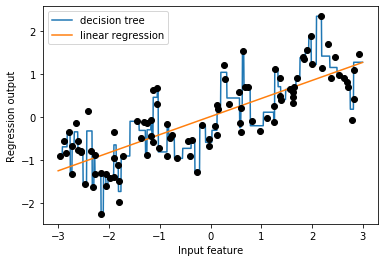

In [48]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

req = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, req.predict(line), label="decision tree")

req = LinearRegression().fit(X, y)
plt.plot(line, req.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

**Figure 4-1. Comparing linear regression and a decision tree on the wave dataset**

ご存知のように、線形モデルは線形関係のみをモデル化できます。  
線形関係は、単一のfeature(特徴)の場合は線です。  
decision treeは、データのはるかに複雑なモデルを構築できます。  
ただし、これはデータの表現に強く依存します。  
連続データで線形モデルをより強力にする1つの方法は、ここで説明するように、feature(特徴)のbinning（discretization(離散化)とも呼ばれます）を使用して、feature(特徴)を複数のfeature(特徴)に分割することです。

特徴の入力範囲（この場合は–3から3までの数値）を固定数のbins-ビン-（たとえば10）に分割することを想像します。  
データポイントは、どのビンに分類されるかによって表されます。  
これを決定するには、最初にビンを定義する必要があります。  
この場合、–3と3の間に等間隔で配置された10個のビンを定義します。  
これに　np.linspace関数を使用して、11個のエントリを作成し、10個のビンを作成します。  
これらは2つの連続する境界の間のスペースです。

In [49]:
bins = np.linspace(-3, 3, 11)
print("bin: {}".format(bins))

bin: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


ここで、最初のビンには、特徴値が–3から–2.68のすべてのデータポイントが含まれ、2番目のビンには、特徴値が–2.68から–2.37のすべてのポイントが含まれます。  

次に、どのビンに分類されるかをデータポイントごとに記録します。  
これは、np.digitize関数を使用して簡単に計算できます。

In [84]:
# X(wave回帰データ)をbinsごとに分ける
which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])
which_bin.shape


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


(100, 1)

ここで私たちが行ったことは、waveデータセットの単一の連続入力特徴量を、データポイントがどのビンにあるかをコード化するカテゴリ特徴量に変換することです。  
このデータでscikitlearnモデルを使用するために、前処理モジュールの OneHotEncoder を使用して、この離散的な特徴量をワンホットエンコーディングに変換しています。  
OneHotEncoder は pandas.get_dummies と同じエンコーディングを行いますが、現在のところ整数のカテゴリ変数でしか動作しません。

In [51]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoderを使用して変換
encoder = OneHotEncoder(sparse=False)

# encoder.fitは、which_binに表示される一意の値を検索します
encoder.fit(which_bin)

# 変換により、on-hot エンコーディングが作成されます
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


10個のビンを指定したため、変換されたデータセットX_binnedは10個の特徴で構成されています。

In [52]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


次に、one-hotエンコードされたデータに新しい線形回帰モデルと新しい決定木モデルを構築します。  
結果は、黒い点線で示されているビンの境界とともに、図4-2に視覚化されています。

Text(0.5, 0, 'Input feature')

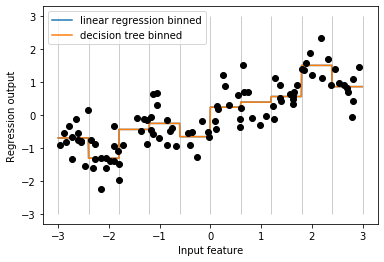

In [54]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

req = LinearRegression().fit(X_binned, y)
plt.plot(line, req.predict(line_binned), label='linear regression binned')

req = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, req.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

**Figure 4-2. Comparing linear regression and decision tree regression on binned features**

破線と実線は正確に重なり合っています。  
つまり、線形回帰モデルと決定木はまったく同じ予測を行います。  
各ビンについて、定数値を予測します。  
特徴は各ビン内で一定であるため、どのモデルでもビン内のすべてのポイントに対して同じ値を予測する必要があります。  
特徴をビニングする前と後にモデルが学習したことを比較すると、線形モデルはビンごとに異なる値を持つようになったため、はるかに柔軟になりましたが、決定木モデルははるかに柔軟性が低くなりました。  
これらのモデルはどこでもデータを分割することを学習できるため、ビニング機能は一般にツリーベースのモデルには有益な効果がありません。  
ある意味で、これは、決定木がこのデータの予測に最も役立つビニングを学習できることを意味します。  
さらに、デシジョンツリーは一度に複数の機能を調べますが、ビニングは通常、機能ごとに行われます。  
ただし、線形モデルは、データの変換による表現力の面で大きなメリットがありました。  

特定のデータセットに線形モデルを使用する正当な理由がある場合（たとえば、非常に大きく高次元であるが、一部の機能は出力と非線形の関係にあるため）、ビニングはモデリング能力を高めるための優れた方法です。

**KBinsDiscretizer by bin continuous data into intervals(連続データを間隔にビン化するKBinsDiscretizer)**

In [85]:
from sklearn.preprocessing import KBinsDiscretizer

In [87]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
# 各binの形状を確認
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


In [88]:
X_binned = kb.transform(X)
X_binned

<100x10 sparse matrix of type '<class 'numpy.float64'>'
	with 100 stored elements in Compressed Sparse Row format>

In [89]:
print(X[:10])
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

上記でnp.linspace関数をしようした時と同じく10個のbinがつくられ新しい特徴になっている。  
この場合、np.digitize関数を使用して、どのビンに分類されるかをデータポイントごとに記録する手間が無い。  
同じようにプロットします。

In [109]:
# binを作成する、onehot-denseエンコードメソッドを使う(デフォルトではonehot)
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)
print(X_binned.shape)

(100, 10)


Text(0.5, 0, 'Input feature')

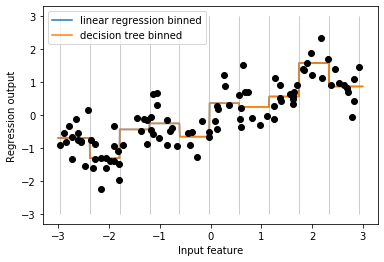

In [97]:
# wave回帰データをonehot-denseエンコードされたデータに新しい線形回帰モデルと新しい決定木モデルを構築します。
line_binned = kb.transform(line)
req = LinearRegression().fit(X_binned, y)
plt.plot(line, req.predict(line_binned), label='linear regression binned')

req = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, req.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")

### Interactions and Polynomials(相互作用と多項式)

特に線形モデルの特徴表現を充実させる別の方法は、元のデータの相互作用特徴(interaction feature)と多項式特徴(polynomial feature)を追加することです。  
この種の機能エンジニアリングは、統計モデリングでよく使用されますが、多くの実用的な機械学習アプリケーションでも一般的です。  

最初の例として、図(figure)4-2をもう一度見てください。  
線形モデルは、waveデータセット内の各ビンの定数値を学習しました。  
ただし、線形モデルはオフセットだけでなく勾配(slopes)も学習できることを私たちは知っています。  
ビニングされたデータの線形モデルに勾配(slopes)を追加する1つの方法は、元の特徴（プロットのx軸）を追加し直すことです。  
これにより、図(figure)4-3に示すように、11次元のデータセットが作成されます。

In [113]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


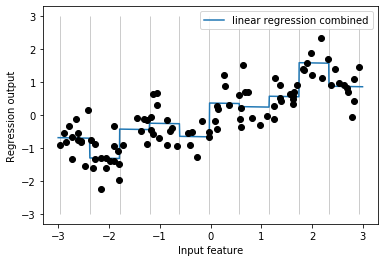

In [114]:
reg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='linear regression combined')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.plot(X[:, 0], y, 'o', c='k')

**Figure 4-3. Linear regression using binned features and a single global slope**

この例では、モデルは勾配とともに各ビンのオフセットを学習しました。  
学習された勾配は下向きであり、すべてのビンで共有されます。  
単一の勾配を持つ単一のx軸機能があります。  
スロープはすべてのビンで共有されているため、あまり役に立たないようです。  
ビンごとに別々のスロープが必要です。  
これは、データポイントがどのビンにあり、x軸のどこにあるかを示す相互作用または積の特徴(product feature)を追加することで実現できます。  
この機能は、ビンインジケータと元の機能の積(product)です。  
このデータセットを作成しましょう  

- ここではサンプル数が少ないため、書籍通りにはいかない。  
対策としてwave回帰データをサンピリングしたときのmake_wave(n_samples=100)を120にくらいに変更するとよい。  
著者のgithubを参考

In [115]:
# product featureを追加
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


データセットには20の機能があります。  
データポイントがどのbinにあるかを示すインジケーターと、元の機能とbinインジケーターの積(product)です。  
積の特徴は、各ビンのx軸機能の個別のコピーと考えることができます。  
これはビン内の元の機能であり、それ以外の場所ではゼロです。  
Figure4-4は、この新しい表現での線形モデルの結果を示しています。

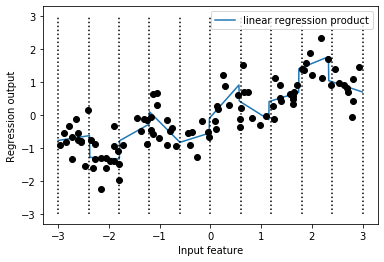

In [116]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
    
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

**Figure 4-4. Linear regression with a separate slope per bin**

ご覧のとおり、このモデルでは、各ビンに独自のオフセットと勾配があります。  

ビニングの使用は、連続機能を拡張する1つの方法です。  
もう1つは、元の機能の多項式を使用することです。  
特定の機能xについて、x ** 2、x ** 3、x ** 4などを検討することをお勧めします。  
これは、前処理(preprocessing)モジュールの PolynomialFeatures に実装されています。

In [118]:
from sklearn.preprocessing import PolynomialFeatures

# x ** 10までの多項式を含める
# デフォルトの「include_bias = True」は、常に1である機能を追加します
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

次数(degree)10を使用すると、10個の特徴が生成されます。

In [119]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (100, 10)


X_polyのエントリをXのエントリと比較してみましょう。

In [120]:
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


各機能の指数を提供する get_feature_namesメソッドを呼び出すことにより、機能のセマンティクスを取得できます。

In [121]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


X_polyの最初の列がXに正確に対応し、他の列が最初のエントリの累乗であることがわかります。  
一部の値がどれだけ大きくなるかを確認するのは興味深いことです。  
2番目の列には、20,000を超えるエントリがあり、他の列とは桁違いに異なります。  

線形回帰(linear regression)モデルと一緒に多項式機能(polynomial features)を使用すると、多項式回帰(polynomial regression)の古典的なモデルが生成されます（図4-5を参照）。

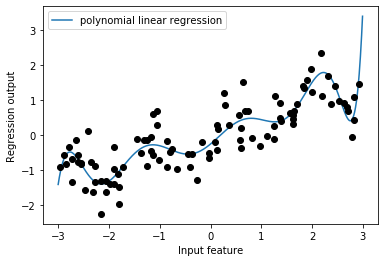

In [122]:
reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

Figure 4-5. Linear regression with tenth-degree polynomial features

ご覧のとおり、多項式(polynomial)の特徴は、この1次元データに非常にスムーズに適合します。  
ただし、次数の高い(heigh degree)多項式は、境界上またはデータの少ない領域で極端に動作する傾向があります。  

比較として、変換なしで元のデータで学習されたカーネルSVMモデルを次に示します（図4-6を参照）

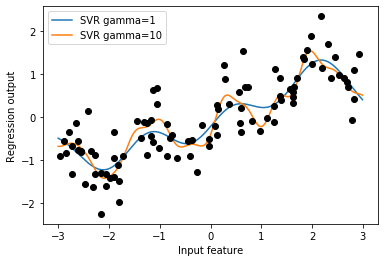

In [123]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
    
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

**Figure 4-6. Comparison of different gamma parameters for an SVM with RBF kernel**

より複雑なモデルであるカーネルSVMを使用すると、特徴を明示的に変換することなく、多項式回帰と同様に複雑な予測を学習できます。  

相互作用(interaction)と多項式(polynomials)のより現実的なアプリケーションとして、Boston Housing(ボストン住宅)のデータセットをもう一度見てみましょう。  
このデータセットでは、第2章ですでに多項式の特徴を使用しました。  
次に、これらの特徴がどのように構築されたか、および多項式の特徴がどの程度役立つかを見てみましょう。  
まず、データをロードし、MinMaxScalerを使用して0から1の間に再スケーリングします。

In [125]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)
    
# データの再スケーリング
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ここで、次数2までの多項式の特徴と相互作用を抽出します。

In [126]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)

# スケーリングした特徴を多項式に変換する
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


データには元々13の特徴があり、105の相互作用の特徴に拡張されました。  
これらの新しい機能は、2つの異なる元の機能間のすべての可能な相互作用、および各元の機能の2乗を表します。  
ここで、degree=2は、最大2つの元の機能の積であるすべての機能を調べることを意味します。  
入力機能と出力機能の正確な対応は、get_feature_namesメソッドを使用して見つけることができます  

In [127]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


最初の新機能は、ここでは「1」と呼ばれる定数機能です。  
次の13の機能は、元の機能（「x0」から「x12」と呼ばれます）です。  
次に、最初の2乗された特徴（ "x0 ^ 2"）と、最初の特徴と他の特徴の組み合わせに従います。  

相互作用がある場合とない場合のデータでRidgeを使用したパフォーマンスを比較してみましょう。

In [128]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(ridge.score(X_test_poly, y_test)))

Score without interactions: 0.621
Score with interactions: 0.753


明らかに、相互作用と多項式の特徴により、Ridgeを使用した場合のパフォーマンスが大幅に向上しました。　　
ただし、ランダムフォレストのようなより複雑なモデルを使用する場合、話は少し異なります。

In [129]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(rf.score(X_test_scaled, y_test)))

rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.778
Score with interactions: 0.782


追加機能がなくても、ランダムフォレストがRidgeのパフォーマンスを上回っていることがわかります。  
相互作用(interaction)と多項式(polynomials)を追加すると、実際にはパフォーマンスがわずかに低下します。

### Univariate Nonlinear Transformations(単変量非線形変換)

二乗または立方体の特徴を追加すると、回帰の線形モデルに役立つことがわかりました。  
特定の機能を変換するのに役立つことが多い他の変換があります。  
特に、log、exp、sinなどの数学関数を適用します。  

ツリーベースのモデルは特徴の順序のみを考慮しますが、線形モデル(linear model)とneural networks(ニューラルネットワーク)は各特徴のスケールと分布(distribution)に非常に関係しており、特徴とターゲットの間に非線形(nonlinear)の関係(relation)がある場合、モデル化が困難になります—特に回帰(regression)において。  

関数logおよびexpは、データの相対(relative)スケールを調整して、線形モデルまたはニューラルネットワークでより適切にキャプチャできるようにすることで役立ちます。  

第2章で、メモリ価格データを使用してそのアプリケーションを確認しました。  
sin関数とcos関数は、周期的(periodic)なパターンをエンコードするデータを処理するときに役立ちます。  

ほとんどのモデルは、各特徴（および回帰ではターゲットも）が緩くガウス分布(gaussian distributed)している場合に最適に機能します。  
つまり、各特徴のヒストグラムは、おなじみの「bell curve(ベルカーブ)」形状に似ている必要があります。  
logやexpのような変換を使うのは、ハックな方法ですが、シンプルで効率的な方法です。    

このような変換が役立つ可能性がある特に一般的なケースは、整数カウントデータを処理する場合です。  
カウントデータとは、「ユーザーAがログインした頻度」などの機能を意味します。  
カウントが負になることはなく、特定の統計パターンに従うことがよくあります。  

ここでは、実際に見られるものと同様のプロパティを持つカウントの合成(synthetic)データセットを使用しています。  
特徴はすべて整数値ですが、応答は連続的(continuous)です。

In [130]:
# 同じ乱数を発生させる
rnd = np.random.RandomState(0)
# 正規分布にしたがった乱数 normal(平均, 標準偏差, 出力する件数(行＊列も可))
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

# ポアソン分布に従う ndarray
# exp(x)は e の x乗
X = rnd.poisson(10 * np.exp(X_org))

# ベクトルの内積
y = np.dot(X_org, w)

最初の機能の最初の10エントリを見てみましょう。  
すべて整数値で正ですが、それを除けば、特定のパターンを理解するのは困難です。  

各値の出現を数えると、値の分布がより明確になります。

In [139]:
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


値2が最も一般的で、62回出現し（bincountは常に0から始まります）、より高い値のカウントはすぐに低下します。　　
ただし、134が2回表示されるなど、非常に高い値がいくつかあります。　　
図4-7にカウントを視覚化します。

Text(0.5, 0, 'value')

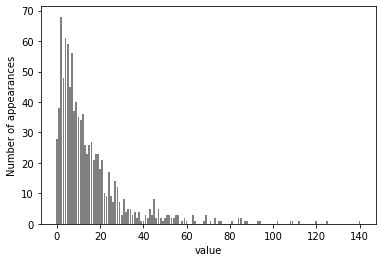

In [140]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("value")

**Figure 4-7. Histogram of feature values for X[0]**

機能X[：、1]とX[：、2]は同様のプロパティを持っています。  
この種の値の分布（多くの小さな値といくつかの非常に大きな値）は、実際には非常に一般的です。  
ただし、これはほとんどの線形モデルではうまく処理できないものです。  
このモデルにリッジ回帰を当てはめてみましょう。

これはポアソン分布であり、データをカウントするための非常に基本的なものです。

In [141]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# score()で、予測の決定係数　R^2　を返します。
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


比較的低い$R^2$スコアからわかるように、リッジはXとyの関係を実際に捉えることができませんでした。  
ただし、対数変換(logarithmic transformation)を適用すると役立つ場合があります。  
値0がデータに表示されるため（対数は0で定義されていないため）、実際にはlogを適用することはできませんが、log（X + 1）を計算する必要があります。

In [142]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

変換後、データの分布は非対称性(asymmetrical)が低くなり、非常に大きな外れ値(outliers)がなくなります  
（図4-8を参照）。

Text(0.5, 0, 'Values')

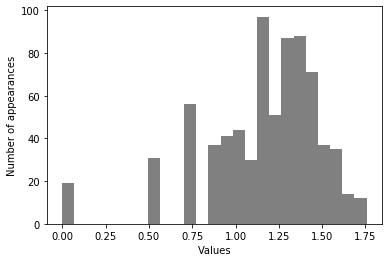

In [143]:
plt.hist(np.log(X_train_log[:, 0] + 1), bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Values")

**Figure 4-8. Histogram of feature values for X[0] after logarithmic transformation**

新しいデータに基づいてridgeモデルを構築すると、より適切に適合します。

In [146]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.875


データセットとモデルの各組み合わせに最適な変換を見つけることは、やや芸術的です。  
この例では、すべての機能が同じプロパティを持っていました。  
これは実際にはめったにありません。  
通常、機能のサブセットのみを変換する必要があります。  
または、各機能を異なる方法で変換する必要がある場合もあります。  
前述したように、これらの種類の変換はツリーベースのモデルには関係ありませんが、線形モデルには不可欠な場合があります。  
回帰でターゲット変数yを変換することも良い考えです。  
カウント（たとえば、注文数）を予測しようとすることはかなり一般的なタスクであり、log（y + 1）変換を使用すると役立つことがよくあります。  

これは、ポアソン回帰(Poisson regression)を使用した非常に大まかな近似(crude approximation)であり、確率論的(probabilistic)な観点(standpoint)から適切な解決策になります。

前の例で見たように、ビニング(binning)、多項式(polynomails)、および相互作用(interactions)は、特定のデータセットでのモデルのパフォーマンスに大きな影響を与える可能性があります。  
これは、線形モデルや単純ベイズ(Naive Bayes)モデルなどのそれほど複雑でないモデルに特に当てはまります。  

一方、ツリーベースのモデルは、重要な相互作用を自分で発見できることが多く、ほとんどの場合、データを明示的に変換する必要はありません。  

SVM、最近傍(nearest neighbors)、ニューラルネットワーク(neural networks)などの他のモデルは、ビニング、相互作用、または多項式を使用することでメリットが得られる場合がありますが、その意味は通常、線形モデルの場合よりもはるかに明確ではありません。

### Automatic Feature Selection(自動特徴選択)

新しい特徴を作成する方法が非常に多いため、元の特徴の数を超えてデータの次元を増やしたいと思うかもしれません。  
ただし、機能を追加すると、すべてのモデルがより複雑になるため、過剰適合の可能性が高くなります。  

新しい機能を追加する場合、または一般に高次元のデータセットを使用する場合は、機能の数を最も有用なものだけに減らし、残りを破棄することをお勧めします。  
これにより、より一般化された単純なモデルにつながる可能性があります。  

しかし、各機能がどれほど優れているかをどうやって知ることができますか？  
3つの基本的な戦略があります：
- 単変量統計(univariate)、
- モデルベースの選択(model-base selection)、
- および反復選択(iterative selection)。  

3つすべてについて詳しく説明します。  
これらのメソッドはすべて教師ありメソッドです。  
つまり、モデルをフィッティングするためのターゲットが必要です。  
これは、データをトレーニングセットとテストセットに分割し、データのトレーニング部分にのみ特徴選択を適合させる必要があることを意味します。

#### Univariate Statistics(単変量統計)

単変量統計(univariate statistics)では、各特徴とターゲットの間に統計的に有意な関係があるかどうかを計算します。  
次に、最も信頼度の高い機能が選択されます。  
分類の場合、これは分散分析(also known as analysis of variance)（ANOVA）とも呼ばれます。  
これらのテストの重要な特性は、単変量(univariate)であるということです。つまり、各機能を個別に検討するだけです。  
したがって、別の機能と組み合わせた場合にのみ情報を提供する機能は破棄されます。  
多くの場合、単変量テストは計算が非常に高速であり、モデルを構築する必要はありません。  
一方、これらは、特徴選択後に適用する可能性のあるモデルから完全に独立しています。  

scikit-learnで単変量特徴選択を使用するには、テストを選択する必要があります。  
通常、分類には f_classif（デフォルト）または回帰には f_regression のいずれかを選択し、テストで決定されたp値に基づいて特徴を破棄する方法を選択します。    
パラメータを破棄するすべての方法では、しきい値(threshold)を使用して、p値が高すぎるすべての特徴を破棄します（つまり、ターゲットに関連している可能性は低いです）。  
方法は、このしきい値(threshold)の計算方法が異なります。  
最も単純な方法は、固定数kの特徴を選択する SelectKBestと、固定パーセンテージの特徴を選択するSelectPercentileです。  
がんデータセットの分類に特徴選択を適用してみましょう。  
タスクを少し難しくするために、情報を提供しないノイズ機能をデータに追加します。  
特徴選択は、有益ではない特徴を識別し、それらを削除できることを期待しています。

In [147]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# 決定論的な乱数を取得する
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))

# データにノイズ機能を追加する
# 最初の30個の特徴はデータセットからのものであり、次の50個はノイズです
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
    X_w_noise, cancer.target, random_state=0, test_size=.5)

# f_classif（デフォルト）とSelectPercentileを使用して、機能の50％を選択します
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)

# トレーニングセットを変換する
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


ご覧のとおり、機能の数は80から40に減少しました（元の機能の数の50％）。  
get_supportメソッドを使用して、選択された機能を確認できます。  
このメソッドは、選択された機能のブールマスクを返します  
（図4-9に視覚化されています）。

[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Sample index')

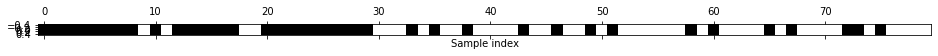

In [149]:
mask = select.get_support()
print(mask)

# マスクを視覚化する-黒はTrue、白はFalse
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

**Figure 4-9. Features selected by SelectPercentile**

マスクの視覚化からわかるように、選択された機能のほとんどは元の機能であり、ノイズ機能のほとんどは削除されています。  
ただし、元の機能の復元は完全ではありません。  
すべての機能のロジスティック回帰のパフォーマンスを、選択した機能のみを使用したパフォーマンスと比較してみましょう。

In [152]:
from sklearn.linear_model import LogisticRegression

# テストデータの変換
X_test_selected = select.transform(X_test)

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))

lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(
    lr.score(X_test_selected, y_test)))

Score with all features: 0.951
Score with only selected features: 0.933


この場合、元の機能の一部が失われたとしても、ノイズ機能を削除するとパフォーマンスが向上しました。  
これは非常に単純な合成例であり、実際のデータの結果は通常混合されています。  
ただし、単変量(univariate)の特徴選択は、モデルを構築することが不可能なほど多数の特徴がある場合、または多くの特徴が完全に有益ではないと思われる場合でも、非常に役立ちます。

#### Model-Based Feature Selection(モデルベースの特徴選択)

モデルベースの特徴選択では、教師あり機械学習モデルを使用して各特徴の重要性を判断し、最も重要なもののみを保持します。  
特徴選択に使用される教師ありモデルは、最終的な教師ありモデリングに使用されるモデルと同じである必要はありません。  
特徴選択モデルは、この尺度でランク付けできるように、各特徴の重要性の尺度を提供する必要があります。  
決定木および決定木ベースのモデルは、各特徴の重要度を直接エンコードする feature_importances_属性を提供します。  
線形モデルには係数があり、絶対値を考慮して特徴の重要性を把握するためにも使用できます。  
第2章で見たように、L1ペナルティのある線形モデルは、特徴の小さなサブセットのみを使用するスパース係数を学習します。  
これは、モデル自体の特徴選択の一形態と見なすことができますが、別のモデルの特徴を選択するための前処理ステップとしても使用できます。  
単変量選択とは対照的に、モデルベースの選択ではすべての機能が一度に考慮されるため、相互作用をキャプチャできます（モデルがそれらをキャプチャできる場合）。  
モデルベースの特徴選択を使用するには、SelectFromModelトランスフォーマーを使用する必要があります。

In [156]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")

SelectFromModelクラスは、提供されたしきい値(threshold)よりも大きい機能の重要度（監視ありモデルによって提供される）を持つすべての機能を選択します。  
単変量特徴選択で得られた結果と同等の結果を得るために、中央値(median)をしきい値として使用し、特徴の半分が選択されるようにしました。  
100本の木を持つランダムフォレスト分類器を使用して、特徴の重要度を計算します。  
これは非常に複雑なモデルであり、単変量テストを使用するよりもはるかに強力です。  
それでは、実際にモデルを適合させましょう。

In [157]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


ここでも、選択された機能を確認できます（図4-10）。 

Text(0.5, 0, 'Sample index')

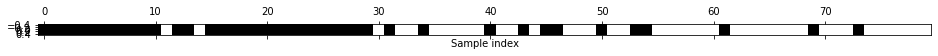

In [158]:
mask = select.get_support()

# マスクを視覚化する-黒はTrue、白はFalse
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")

**Figure 4-10. Features selected by SelectFromModel using the RandomForestClassifier**

今回は、2つを除くすべての元の機能が選択されました。   
40個のフィーチャを選択するように指定したため、一部のノイズフィーチャも選択されています。パフォーマンスを見てみましょう。

In [161]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Test score; {:.3f}".format(score))

Test score; 0.930


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


より良い特徴選択により、ここでもいくつかの改善が得られました。

#### Iterative Feature Selection(反復的な特徴選択)

単変量(univariate)テストではモデルを使用しませんでしたが、モデルベースの選択では単一モデルを使用して特徴を選択しました。  
反復的な特徴選択では、さまざまな数の特徴を備えた一連のモデルが構築されます。  
基本的な方法は2つあります。  
機能なしで開始して停止基準に達するまで機能を1つずつ追加する方法と、すべての機能から開始して停止基準に達するまで機能を1つずつ削除する方法です。  
一連のモデルが構築されているため、これらの方法は、前に説明した方法よりもはるかに計算コストが高くなります。  
この種の特定の方法の1つは、再帰的特徴除去-recursive feature elimination-（RFE）です。  
これは、すべての機能から開始し、モデルを構築し、モデルに従って最も重要度の低い特徴を破棄します。  
次に、破棄されたフィーチャを除くすべてを使用して新しいモデルが構築され、事前に指定された数のフィーチャのみが残るまで続きます。  
これが機能するためには、モデルベースの選択の場合と同様に、選択に使用されるモデルが機能の重要性を判断するための何らかの方法を提供する必要があります。  
ここでは、前に使用したものと同じランダムフォレストモデルを使用して、図4-11に示す結果を取得します。

Text(0.5, 0, 'Sample index')

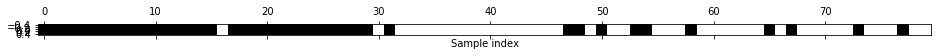

In [164]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

select.fit(X_train, y_train)

# 選択した機能を視覚化します。
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')

plt.xlabel("Sample index")

**Figure 4-11. Features selected by recursive feature elimination with the random forest
classifier model**

特徴選択は、単変量(univariate)およびモデルベースの選択と比較して優れていましたが、それでも1つの特徴が欠落していました。  
ランダムフォレストモデルは、ドロップされる機能ごとに1回ずつ、40回トレーニングされるため、このコードの実行には、モデルベースの選択よりも大幅に時間がかかります。  
特徴選択にRFEを使用する場合のロジスティック回帰モデルの精度をテストしてみましょう。

In [166]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.930


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ここで、RFE内で使用されるランダムフォレストのパフォーマンスは、選択した機能に加えてロジスティック回帰モデルをトレーニングすることによって達成されるパフォーマンスと同じです。  
つまり、適切なフィーチャを選択すると、線形モデルはランダムフォレストと同様に機能します。  

機械学習アルゴリズムへの入力として何を使用するかがわからない場合は、自動機能選択(autmatic feature selection)が非常に役立ちます。  
また、必要な機能の量を減らすのにも最適です。  
たとえば、予測を高速化したり、より解釈しやすいモデルを作成したりできます。  
ほとんどの実際のケースでは、特徴選択を適用してもパフォーマンスが大幅に向上する可能性はほとんどありません。  
ただし、それでも特徴エンジニアのツールボックスにある貴重なツールです。

### Utilizing Expert Knowledge(専門知識の活用)

特徴量エンジニアリング(feature engineering)は、特定のアプリケーションに専門知識を使用するための重要な場所であることがよくあります。　　
多くの場合、機械学習の目的は、専門家が設計した一連のルールを作成する必要がないようにすることですが、それは、アプリケーションまたはドメインに関する事前の知識を破棄する必要があるという意味ではありません。  
多くの場合、ドメインの専門家は、データの最初の表現よりもはるかに有益な有用な機能を特定するのに役立ちます。  
あなたが旅行代理店で働いていて、フライト価格を予測したいとします。  
日付、航空会社、出発地、目的地とともに価格の記録があるとします。  
機械学習モデルは、そこからまともなモデルを構築できる可能性があります。  
ただし、フライト価格のいくつかの重要な要素は学習できません。  
たとえば、フライトは通常、休暇のピーク時や休日の前後に高くなります。  
一部の休日（クリスマスなど）の日付は固定されているため、その効果は日付から知ることができますが、月の満ち欠け（ハヌカやイースターなど）に依存したり、当局によって設定されたり（学校の休日など）する場合もあります。 ）。  
各フライトが（グレゴリオ暦）日付のみを使用して記録されている場合、これらのイベントをデータから学習することはできません。  
ただし、フライトが祝日または学校の休日の前、前、後のいずれであったかをエンコードする機能を追加するのは簡単です。  
このようにして、タスクの性質に関する事前の知識を機能にエンコードして、機械学習アルゴリズムを支援することができます。  
機能を追加しても、機械学習アルゴリズムでその機能を使用する必要はありません。  
また、休日の情報がフライト価格に情報を提供しないことが判明した場合でも、この情報でデータを拡張しても問題はありません。  

ここで、専門知識を使用する1つの特定のケースを見ていきます。  
ただし、この場合は、より正当に「common sense(常識)」と呼ばれる可能性があります。  
タスクは、アンドレアスの家の前での自転車のレンタルを予測することです。  

ニューヨークでは、シティバイクはサブスクリプションシステムを備えた自転車レンタルステーションのネットワークを運営しています。  
駅は街中にあり、移動するのに便利な方法を提供します。  
レンタサイクルのデータは匿名化されて公開され、さまざまな方法で分析されています。  
私たちが解決したいタスクは、アンドレアスの家の前で何人の人が自転車を借りるのかを特定の時間と日に予測することです。  
これにより、彼は自転車が彼に残されるかどうかを知ることができます。  

最初に、この特定のステーションの2015年8月のデータをpandasデータフレームとしてロードします。  
データを3時間間隔でリサンプリングして、毎日の主な傾向を取得します。

In [167]:
citibike = mglearn.datasets.load_citibike()

In [168]:
print("Citi Bike data:\n{}".format(citibike.head()))

Citi Bike data:
starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


次の例は、1か月全体のレンタル頻度を視覚化したものです（図4-12）。

Text(0, 0.5, 'Rentals')

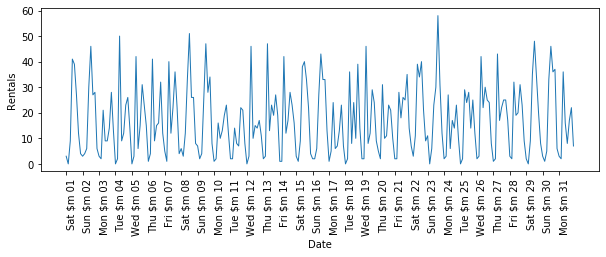

In [170]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
plt.xticks(xticks, xticks.strftime("%a $m %d"), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Rentals")

**Figure 4-12. Number of bike rentals over time for a selected Citi Bike station**

データを見ると、24時間間隔ごとに昼と夜を明確に区別できます。  
平日と週末のパターンもかなり違うようです。  
このような時系列で予測タスクを評価する場合、通常、過去から学び、将来を予測したいと考えています。  
つまり、トレーニングセットとテストセットに分割する場合、特定の日付までのすべてのデータをトレーニングセットとして使用し、その日付以降のすべてのデータをテストセットとして使用する必要があります。  
これは、過去のレンタルについて知っているすべてのことを考えると、通常、時系列予測を使用する方法です。  
明日はどうなると思いますか？  
最初の23日に対応する最初の184データポイントをトレーニングセットとして使用し、残りの8日に対応する残りの64データポイントをテストセットとして使用します。  

予測タスクで使用している唯一の特徴は、特定の数のレンタルが発生した日時です。  
したがって、入力特徴は日付と時刻（たとえば、2015-08-01 00:00:00）であり、出力は次の3時間のレンタル数です（この場合、DataFrameによると3つ）。  

日付がコンピューターに保存される（驚くべきことに）一般的な方法は、POSIX時間を使用することです。  
これは、1970年1月の00:00:00（別名Unix時間の始まり）からの秒数です。  
最初の試みとして、この単一整数特徴をデータ表現として使用できます。

In [176]:
# 目標値（レンタル数）を抽出する
y = citibike.values

# 「％s」を使用して時間をPOSIX時間に変換します
X = citibike.index.strftime("%s").astype("int64").values.reshape(-1, 1)

まず、データをトレーニングセットとテストセットに分割し、モデルを構築して、結果を視覚化する関数を定義します。

In [177]:
# 最初の184個のデータポイントをトレーニングに使用し、残りをテストに使用します
n_train = 184

# 特定の特徴セットでregressorを評価およびプロットする関数
def eval_on_features(features, target, regressor):
    # 指定された特徴をトレーニングセットとテストセットに分割します
    X_train, X_test = features[:n_train], features[n_train:]
    # ターゲット配列も分割します
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))
    
    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,
               ha="left")
    
    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")
    
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
             label="prediction test")
    
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Date")
    plt.ylabel("Rentals")

ランダムフォレストはデータの前処理をほとんど必要としないことを以前に見ました。  
これは、最初から良いモデルのように思われます。  
POSIX時間特徴Xを使用し、ランダムフォレストリグレッサをeval_on_features関数に渡します。  
図4-13に結果を示します。

Test-set R^2: -0.04


<Figure size 432x288 with 0 Axes>

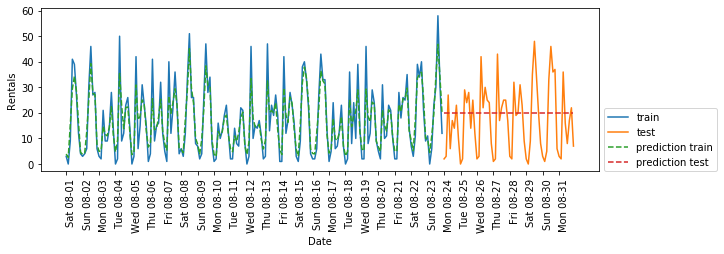

In [178]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure()
eval_on_features(X, y, regressor)

**Figure 4-13. Predictions made by a random forest using only the POSIX time**

ランダムフォレストで通常行われているように、トレーニングセットの予測は非常に良好です。  
ただし、テストセットの場合、一定の線が予測されます。 $R^2$は–0.03です。これは、何も学習しなかったことを意味します。どうした？  

問題は、私たちの特徴とランダムフォレストの組み合わせにあります。　　
テストセットのPOSIX時間機能の値が、トレーニングセットの機能値の範囲外です。  
テストセットのポイントのタイムスタンプが、トレーニングセットのすべてのポイントよりも遅くなっています。  
Trees、したがってランダムフォレストは、トレーニングセット外の特徴範囲に外挿することはできません。  
その結果、モデルはトレーニングセット内の最も近いポイントのターゲット値を単純に予測します。  
これは、データを最後に観測したときです。  

明らかに、これよりもうまくいくことができます。  
これが私たちの「expert knowledge(専門知識)」の出番です。  
トレーニングデータのレンタル数を見ると、時刻と曜日の2つの要素が非常に重要であるように思われます。  
それでは、これら2つの機能を追加しましょう。  
POSIX時間からは実際には何も学ぶことができないため、その機能を削除します。  
まず、1日の時間だけを使用しましょう。  
図4-14に示すように、予測は各曜日で同じパターンになります。

Test-set R^2: 0.60


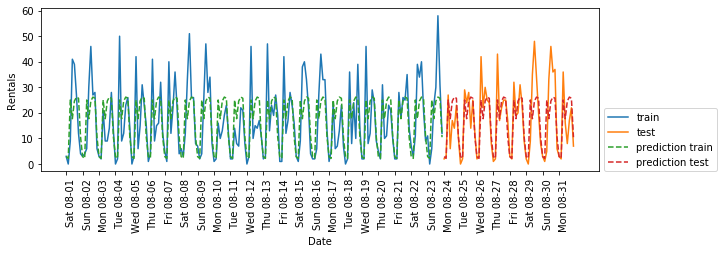

In [181]:
X_hour = citibike.index.hour.values.reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

**Figure 4-14. Predictions made by a random forest using only the hour of the day**

$R^2$はすでにはるかに優れていますが、予測は明らかに毎週のパターンを見逃しています。  
次に、曜日も追加しましょう（図4-15を参照）。

Test-set R^2: 0.84


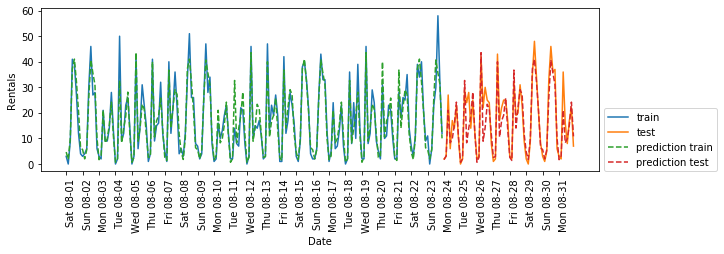

In [183]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1, 1),
                         citibike.index.hour.values.reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

**Figure 4-15. Predictions with a random forest using day of week and hour of day
features**

これで、曜日と時刻を考慮して定期的な動作をキャプチャするモデルができました。  
$R^2$は0.84で、かなり良好な予測パフォーマンスを示します。  
このモデルが学習している可能性が高いのは、8月の最初の23日からの平日と時刻の各組み合わせの平均レンタル数です。  
これは実際にはランダムフォレストのような複雑なモデルを必要としないので、より単純なモデルである線形回帰を試してみましょう（図4-16を参照）。

Test-set R^2: 0.13


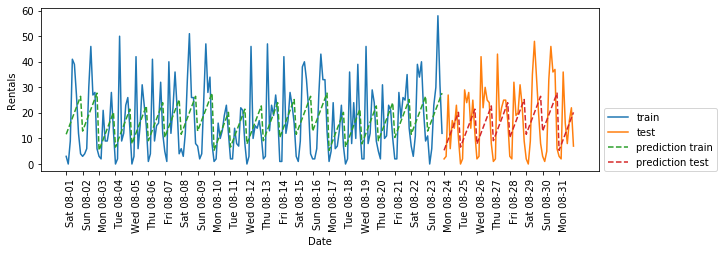

In [185]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

**Figure 4-16. Predictions made by linear regression using day of week and hour of day as
features**

LinearRegressionの動作ははるかに悪く、周期的なパターンは奇妙に見えます。  
この理由は、カテゴリ変数として解釈される整数を使用して曜日と時刻をエンコードしたためです。  
したがって、線形モデルは時刻の線形関数しか学習できません。  
そして、その日の後半には、より多くのレンタルがあることがわかりました。  
ただし、パターンはそれよりもはるかに複雑です。  
One HotEncoderを使用して整数を変換することにより、整数をカテゴリ変数として解釈することで、これをキャプチャできます（図4-17を参照）。

In [186]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

Test-set R^2: 0.62


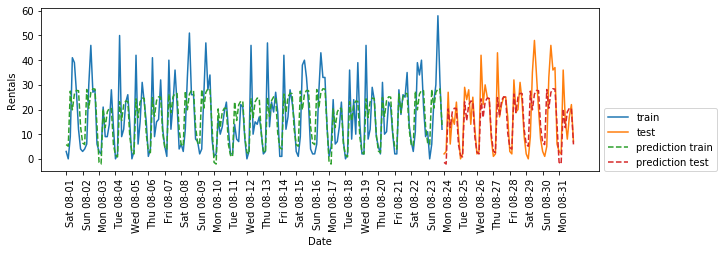

In [187]:
eval_on_features(X_hour_week_onehot, y, Ridge())

**Figure 4-17. Predictions made by linear regression using a one-hot encoding of hour of
day and day of week**

これにより、連続特徴(continuous feature)エンコーディングよりもはるかに優れた一致が得られます。  
これで、線形モデルは、曜日ごとに1つの係数を学習し、時刻ごとに1つの係数を学習します。  
つまり、「時刻」パターンはすべての曜日で共有されます。  

相互作用機能(interaction features)を使用すると、モデルが曜日と時刻の組み合わせごとに1つの係数を学習できるようになります（図4-18を参照）。

Test-set R^2: 0.85


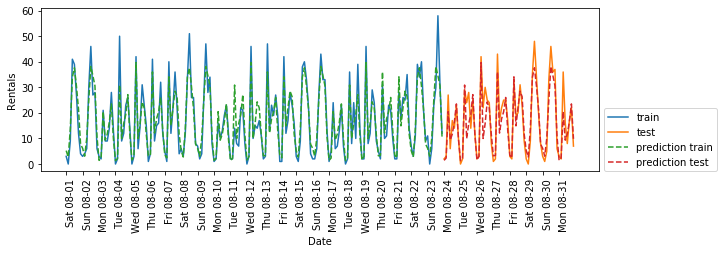

In [189]:
# from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

**Figure 4-18. Predictions made by linear regression using a product of the day of week
and hour of day features**

この変換により、最終的にランダムフォレストと同様に機能するモデルが生成されます。  
このモデルの大きな利点は、何を学習するかが非常に明確であるということです。  
つまり、日と時間に1つの係数です。　　
モデルによって学習された係数を単純にプロットできます。　　
これは、ランダムフォレストでは不可能なことです。  

まず、時間と日の機能の機能名を作成します。

In [190]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features = day + hour

次に、get_feature_namesメソッドを使用して、PolynomialFeaturesによって抽出されたすべての相互作用特徴(interaction features)に名前を付け、係数(coefficents)がゼロ以外の特徴のみを保持します。

In [191]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

これで、図4-19に示すように、線形モデルによって学習された係数を視覚化できます。

Text(0, 0.5, 'Feature')

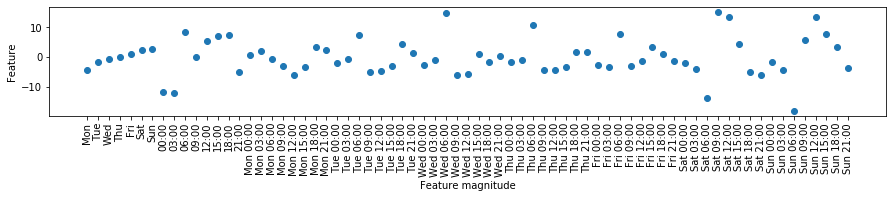

In [192]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Feature magnitude")
plt.ylabel("Feature")

**Figure 4-19. Coefficients of the linear regression model using a product of hour and day**

### Summary and Outlook(まとめと展望)

この章では、さまざまなデータ型（特に、カテゴリ変数）を処理する方法について説明しました。  
機械学習アルゴリズムに適した方法でデータを表現することの重要性を強調しました。  
たとえば、カテゴリ変数をone-hot-encodingで表現します。  
また、新しい特徴を設計することの重要性、およびデータから派生特徴を作成する際に専門知識を利用する可能性についても説明しました。  
特に、線形モデルは、ビニングと多項式(polynomials)および相互作用(interaction)の追加によって新しい特徴を生成することで大きなメリットが得られる可能性がありますが、ランダムフォレストや SVM などのより複雑な非線形モデルは、特徴空間を明示的に拡張することなく、より複雑なタスクを学習できる可能性があります。  
実際には、使用される特徴（および特徴(features)と方法(method)の一致）は、機械学習アプローチをうまく機能させる上で最も重要な要素であることがよくあります。  

データを適切な方法で表現する方法と、どのアルゴリズムをどのタスクに使用するかについての良いアイデアが得られたので、次の章では、機械学習モデルのパフォーマンスの評価と適切なパラメーター設定の選択に焦点を当てます。